In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import pinv
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import os

In [24]:
input_file = r'input_PDI_20_ndptcdi.xlsx'
input_df = pd.read_excel(input_file)
db_file = r'db.xlsx'
db_df = pd.read_excel(db_file)

In [25]:
mixed_output = []
for a in range(input_df['Group'].max()):
    G_df = input_df[input_df['Group']== a+1] #choose rows with same group number
    G_individual = []
    mix_G = []
    D, P, H = 0, 0, 0
    mixed_name = ''
    
    for index, row in G_df.iterrows():
        solvent = db_df[db_df['CAS'] == row['CAS']]
        print(row['CAS'])
        #print(solvent)
        #solvent = db_df[db_df['No.'] == row['No_db']]
        ratio = float(row['Ratio'])
        name = "{:.0%} {}".format(ratio, row['Solvent'])
        #str(ratio) + str(row['Solvent'])
        
        G_individual.append([row, solvent])
        D += ratio*float(solvent['D'])
        P += ratio*float(solvent['P'])
        H += ratio*float(solvent['H'])
        mixed_name += name + '+'
    mixed_name = mixed_name[:-1]
    mixed_G = [a+1, D, P, H, G_individual]
    mixed_output.append(mixed_G)

67-66-3
67-64-1
68-12-2
110-54-3
67-56-1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


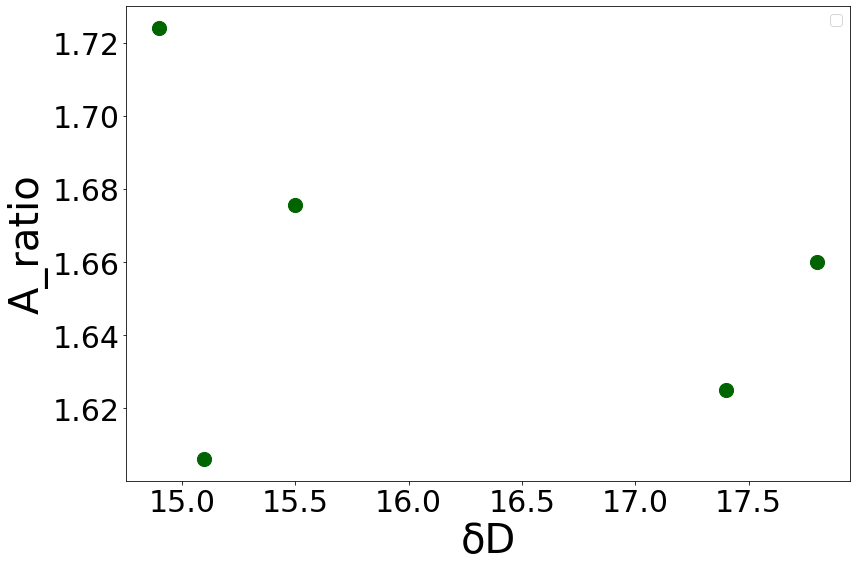

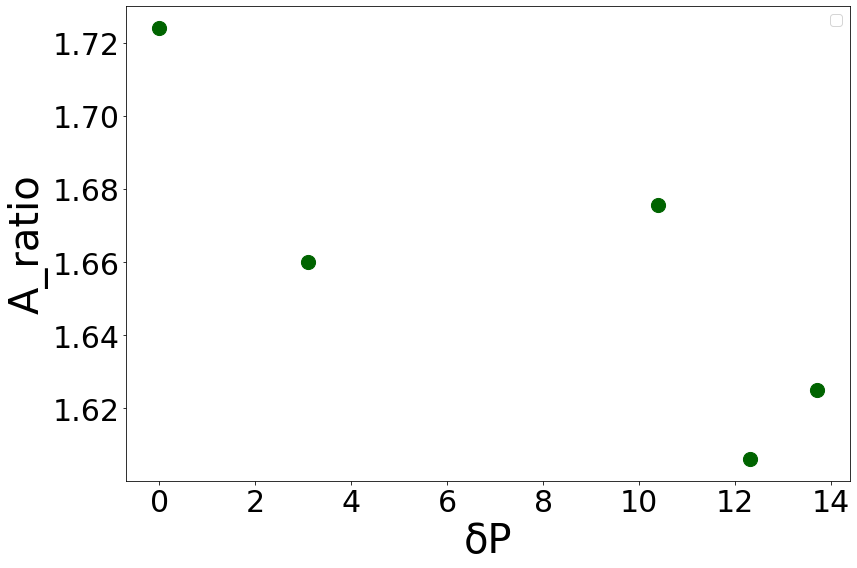

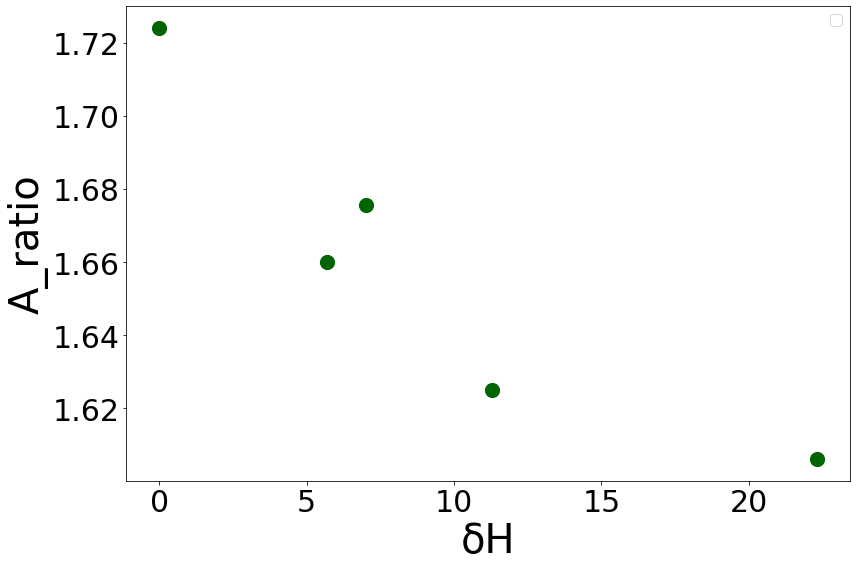

In [26]:
# exp_grp2colour = {
#     'ACN' : 'red',
#     'MeOH' : 'blue',
#     'tBuOH' : 'purple',
#     'EtOH' : 'darkgreen',
#     'But-2-ol' : 'indigo',
# }

# exp_grp2label = {
#     'ACN' : 'ACN',
#     'MeOH' : 'MeOH',
#     'tBuOH' : 'tBuOH',
#     'EtOH' : 'EtOH',
#     'But-2-ol' : 'But-2-ol',
# }

x_toplot = ['D', 'P', 'H']
y_toplot = ['A_ratio']
aix_title = {
    'D' : 'δD',
    'P' : 'δP',
    'H' : 'δH',
    'A_ratio':'A_ratio',}

for x in x_toplot:
    for y in y_toplot:
        fig, ax = plt.subplots(figsize = (12,8))
        fig_name = aix_title[str(x)] + '-' + aix_title[str(y)] + '.png'
        label_check = []
        for op in mixed_output:
            individual = op[4]
            #morp = individual[0][0]['morp']
            #Area = individual[0][0]['Area']
            A_ratio = individual[0][0]['A_ratio']
            #Asp = individual[0][0]['Asp']
            #i_branch = individual[0][0]['i_Branch']
            #j_branch = individual[0][0]['j_Branch']
            #branch = "{}-{}".format(i_branch, j_branch)
            #prop = individual[0][0]['prop'] # proportion of a set of i, j branched structures
            #phi = individual[0][0]['phi']#mass ratio of unimer:seeds
            #mol_name = individual[0][0]['molecule']#involved molecule name
            #item_in_lit = individual[0][0]['Number']#item name in the original literature
            D = [op[1]]
            P = [op[2]]
            H = [op[3]]
        #    print (individual)
        #   print (morp)
            #c = morp2colour[morp] if color == 'default' else color
            #c = exp_grp2colour[item_in_lit]
        #  print (c)

            # l = morp2label[morp]
            # if morp in label_check:
            #     label = ''
            # else:
            #     label = l
            #l = exp_grp2label[item_in_lit]
            # if item_in_lit in label_check:
            #     label = ''
            # else:
            #     label = l
            
            get_value = {
                'D' : D,
                'P' : P,
                'H' : H,
                'A_ratio' : A_ratio,
                }

            ax.scatter(get_value[x], get_value[y], color = 'darkgreen', marker = 'o', s = 200)
            #plt.yticks(np.arange(0, 1.5, 1.0))
            #label_check.append(item_in_lit)

        ax.legend(fontsize = 15, bbox_to_anchor = (1,1))
        ax.tick_params(axis='both', labelsize=30)
        ax.set_xlabel(aix_title[str(x)], fontsize = 40)
        ax.set_ylabel(aix_title[str(y)], fontsize = 40)

        #ax.set_title('PDI-2 Seeded growth', fontsize = 40)

        #ax.grid(which = 'minor')
        #ax.grid(which = 'major')
        plt.tight_layout()
        plt.savefig(fig_name)

In [6]:
class SolvPred():
    
    def __init__(self, input_solv, db):
        self.pred = HSP.SolvPredictor(input_solv, db)

    def mix_pred(self, n = 3, rep_time = 50, std = 0.1, tol_pred = 0.5, red_tol = 0.01):
        self.pred.run_all(n, 17, 11, 20, rep_time = rep_time, std = std, tol = tol_pred, red_tol = red_tol)

sp = SolvPred(r'input_solv_sel.xlsx', r'db.xlsxl')
sp.mix_pred()

NameError: name 'self' is not defined

['c:\\Users\\sh19129\\OneDrive - University of Bristol\\Documents\\MyProject\\ML\\HSP_python\\calculation\\cal_20210609_M_loc_Dauren', 'Dauren_PPAHQ_0606']
c:\Users\sh19129\OneDrive - University of Bristol\Documents\MyProject\ML\HSP_python\calculation\cal_20210609_M_loc_Dauren\Dauren_PPAHQ_0606\
(17.819961533177633, 11.488220909465584, 9.528548564363236)
Converge at 1142 iteration


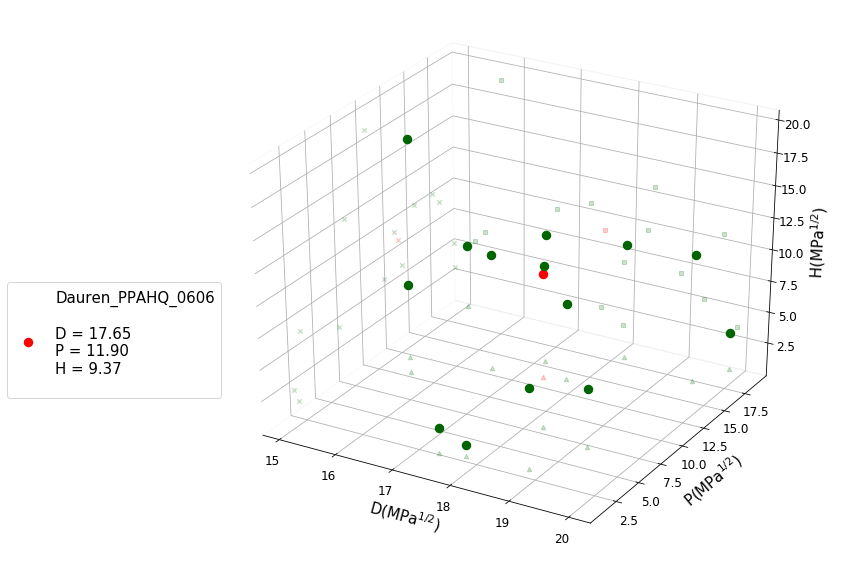

In [8]:
class MLocSolvPred():

    def __init__(self, exp_result, input_solv, db):
        self.mop = LOCM.MLoc(exp_result, db)
        print(self.mop.folder_path)
        self.pred = HSP.SolvPredictor(input_solv, db, folder_name = self.mop.folder_path)
    
    def run_all(self, alpha = 0.001, n_max = 1000000, tol_mop = 0.0001, n = 3, rep_time = 50, std = 0.1, tol_pred = 0.5, red_tol = 0.01):
        cord_result = self.mop.run_all(alpha = alpha, n_max = n_max, tol = tol_mop)
        self.pred.run_all(n, cord_result[0][0], cord_result[0][1], cord_result[0][2], rep_time = rep_time, std = std, tol = tol_pred, red_tol = red_tol)

mp = MLocSolvPred(r'input_Dauren_PPAHQ_0606.xlsx', r'input_solv_sel.xlsx', r'db.xlsx')
mp.run_all()